#     RESULTS OF THE  SET OF SIMULATIONS

## Loading results

In [ ]:
%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis  import *

In [ ]:
# Insert here the name of the simulation set
setname = "sim_great"

In [4]:
final_state_lst, L_lst, t_lst, J_lst, h_lst, T_lst, e_lst, m_lst = load_set_results(setname)

In [5]:
L, T, t_whole, J_whole, h_whole, e_whole, m_whole, final_state = arrange_set_results(L_lst, t_lst, J_lst, h_lst, T_lst, e_lst, m_lst, final_state_lst)
L_num = t_whole.shape[0]
T_num = t_whole.shape[1]
t_num = t_whole.shape[2]

## Global behaviour

<IPython.core.display.Javascript object>


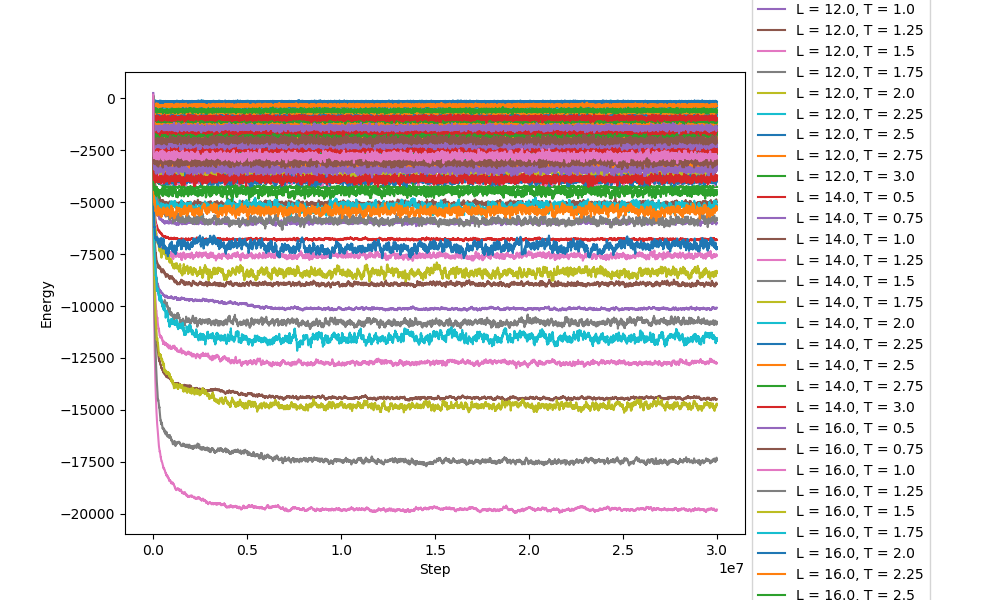

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], e_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Energy")
plt.show()

In [7]:
m_magnitude_whole = np.sqrt(np.sum(m_whole**2, axis = 3))

<IPython.core.display.Javascript object>


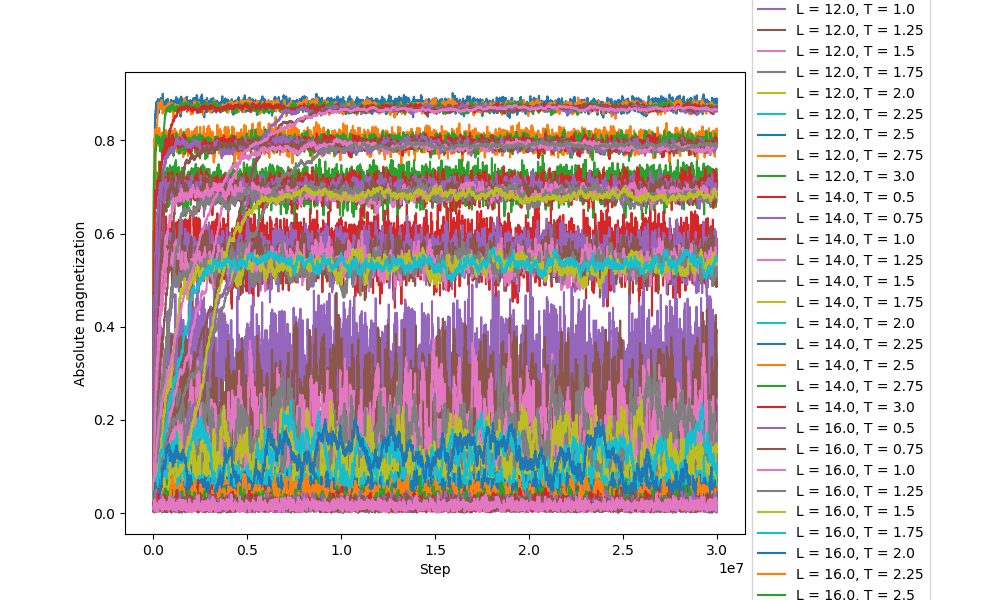

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], m_magnitude_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Absolute magnetization")
plt.show()

## Single ensemble analysis

In [9]:
# Insert here index of the ensemble to be analyzed 
L_idx = 0
T_idx = 0

<IPython.core.display.Javascript object>


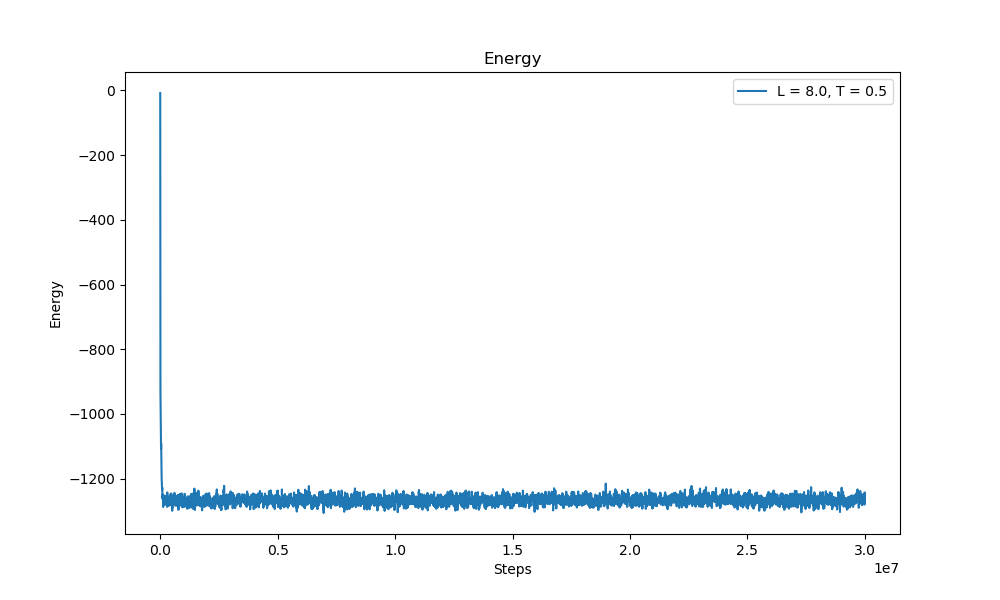

In [10]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], e_whole[L_idx, T_idx], label=f"L = {L[L_idx]}, T = {T[T_idx]}")
ax.legend()
plt.ylabel("Energy")
plt.xlabel("Steps")
plt.title("Energy")
plt.show()

<IPython.core.display.Javascript object>


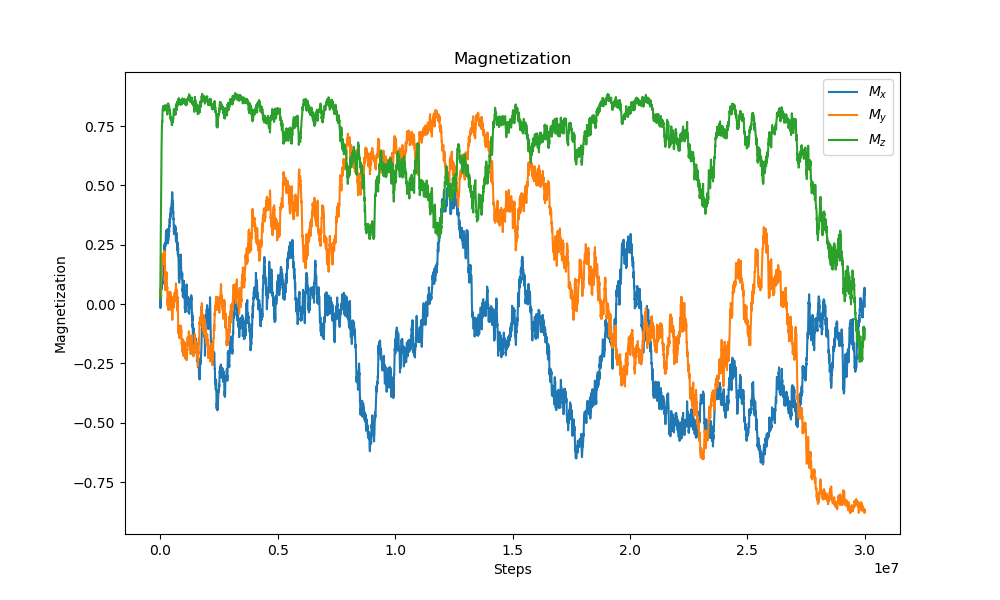

In [11]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 0], label = r"$M_x$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 1], label = r"$M_y$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 2], label = r"$M_z$")
plt.legend()
plt.ylabel("Magnetization")
plt.xlabel("Steps")
plt.title("Magnetization")
plt.show()

<IPython.core.display.Javascript object>


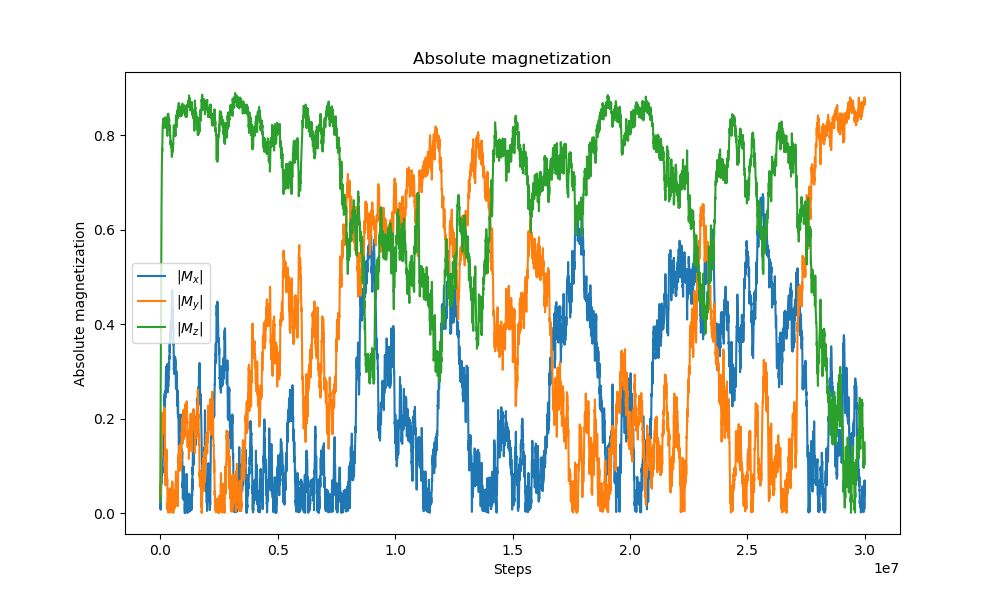

In [12]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 0]), label = r"$|M_x|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 1]), label = r"$|M_y|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 2]), label = r"$|M_z|$")
plt.legend()
plt.ylabel("Absolute magnetization")
plt.xlabel("Steps")
plt.title("Absolute magnetization")
plt.show()

<IPython.core.display.Javascript object>


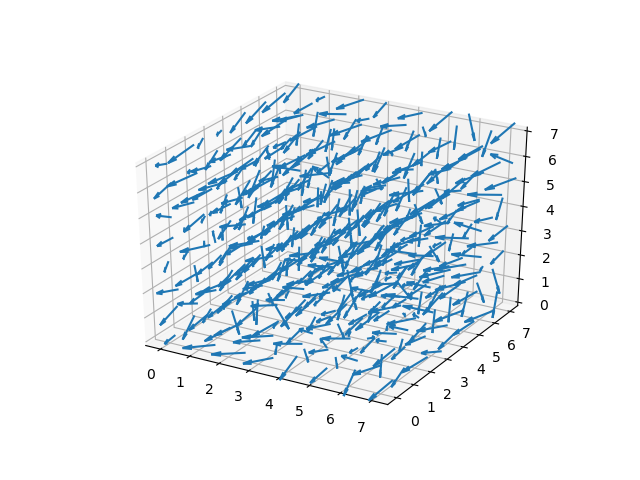

In [13]:
plot_state(final_state[L_idx][T_idx])

## System results

In [14]:
# SELECT WARMUP PERIOD TO LAST UNTIL STEP NUMBER warmup_final_step
warmup_final_step = 1e7
warmup_final_idx = np.argmax(np.equal(t_whole[0,0], warmup_final_step))
t = t_whole[:, :, warmup_final_idx:]
e = e_whole[:, :, warmup_final_idx:]
m = m_whole[:, :, warmup_final_idx:]

In [15]:
e_mean = np.mean(e, axis=2)
m_mean = np.mean(m, axis=2)
m_rmsd = np.sqrt(np.var(m, axis=2))
m_magnitude = np.sqrt(np.sum(m**2, axis = 3))
m_magnitude_mean = np.sqrt(np.sum(m_magnitude**2, axis = 2))

### Mean energy

<IPython.core.display.Javascript object>


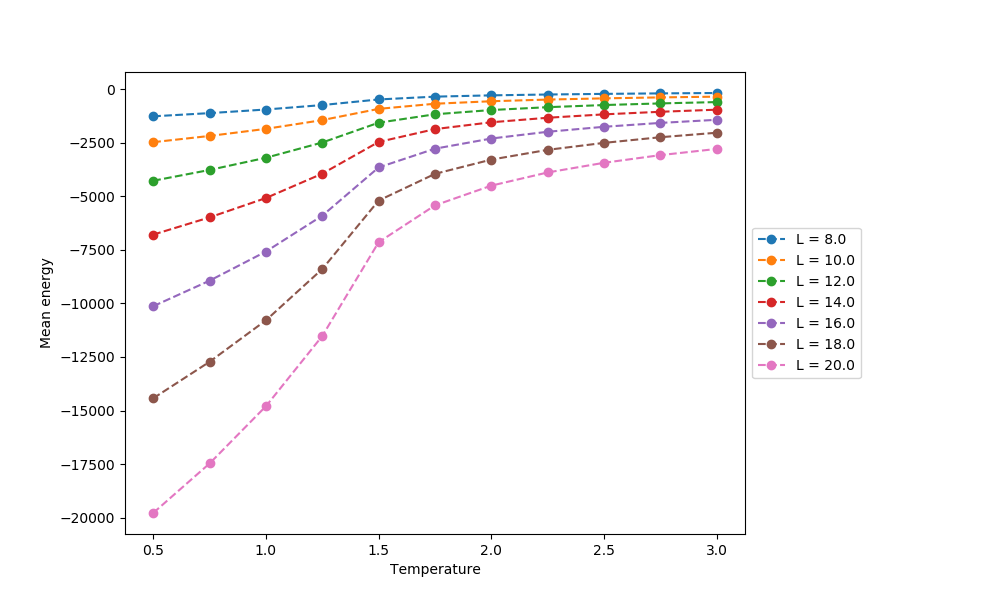

In [16]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, e_mean[i], "o--", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel("Mean energy")
plt.show()

### Mean magnetization magnitude

<IPython.core.display.Javascript object>


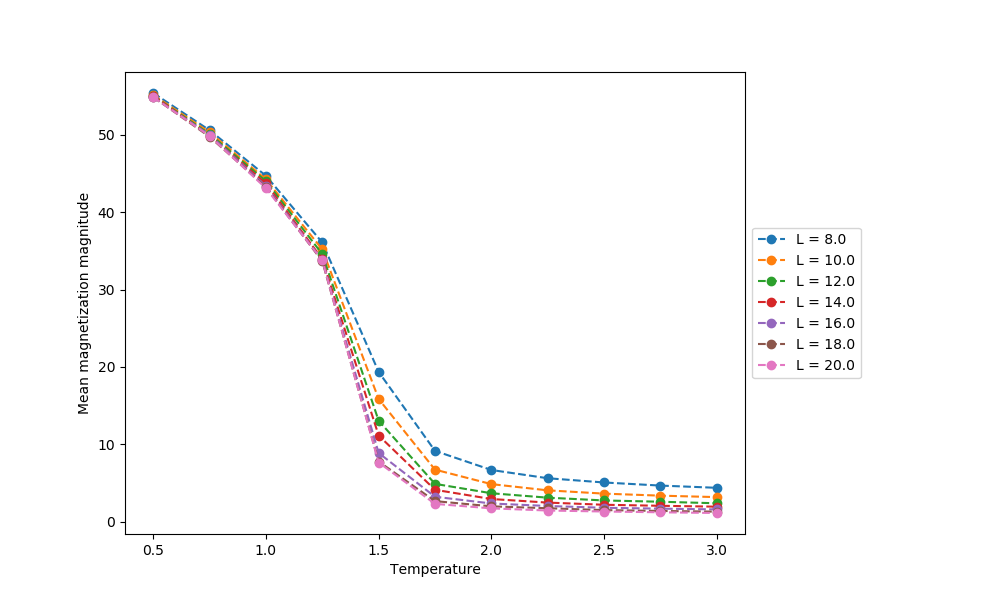

In [17]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, m_magnitude_mean[i], "o--", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel("Mean magnetization magnitude")
plt.show()

### Heat capacity

In [18]:
e_rmsd = np.sqrt(np.var(e, axis=2))

In [19]:
e.shape

(7, 11, 4001)

In [20]:
cv = np.zeros(shape=(L_num, T_num))
for i in np.ndindex(L_num):
    cv[i] = e_rmsd[i]**2/T**2

<IPython.core.display.Javascript object>


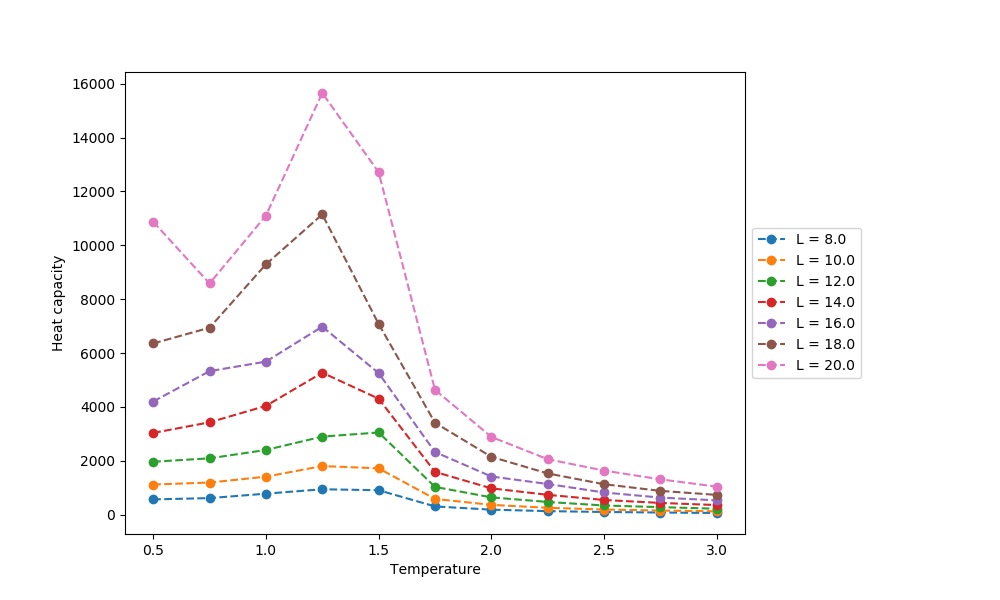

In [21]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, cv[i], "o--", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel("Heat capacity")
plt.show()

### Suscpetibility

In [22]:
def cov(M,i,j):
    M_mean = np.mean(M, axis=2)
    ret = np.zeros(shape=(L_num, T_num))
    for l,t in np.ndindex(L_num, T_num):
        ret[l,t] = np.mean((M[l,t,:,i]-M_mean[l,t,i])*(M[l,t,:,j]-M_mean[l,t,j]))
    return ret

chi_xx = cov(m,0,0)/T
chi_yy = cov(m,1,1)/T
chi_zz = cov(m,2,2)/T
chi_xy = cov(m,0,1)/T
chi_yz = cov(m,1,2)/T
chi_zx = cov(m,2,0)/T


<IPython.core.display.Javascript object>


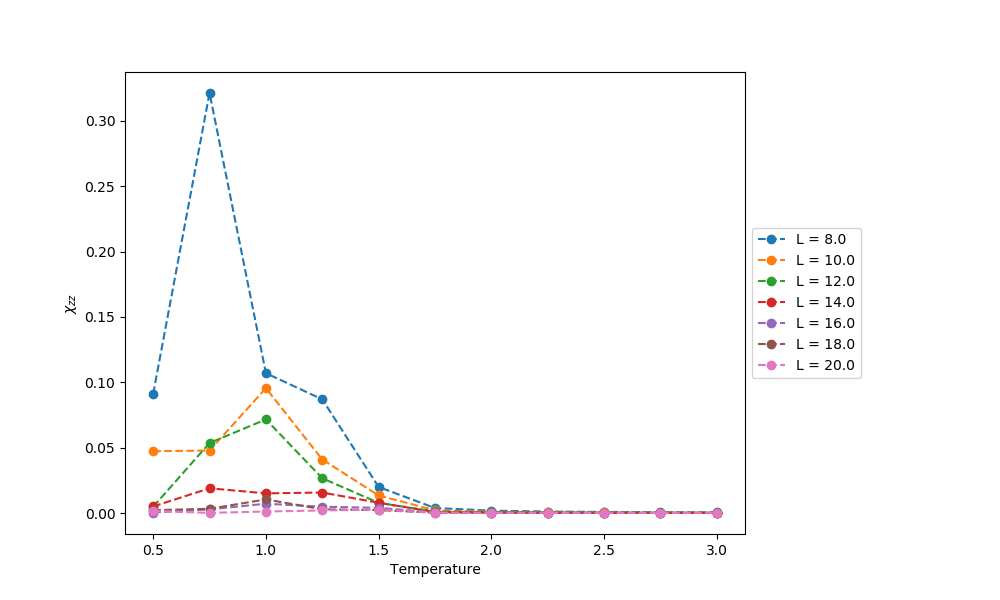

In [23]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, chi_zz[i], "o--", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.show()

<IPython.core.display.Javascript object>


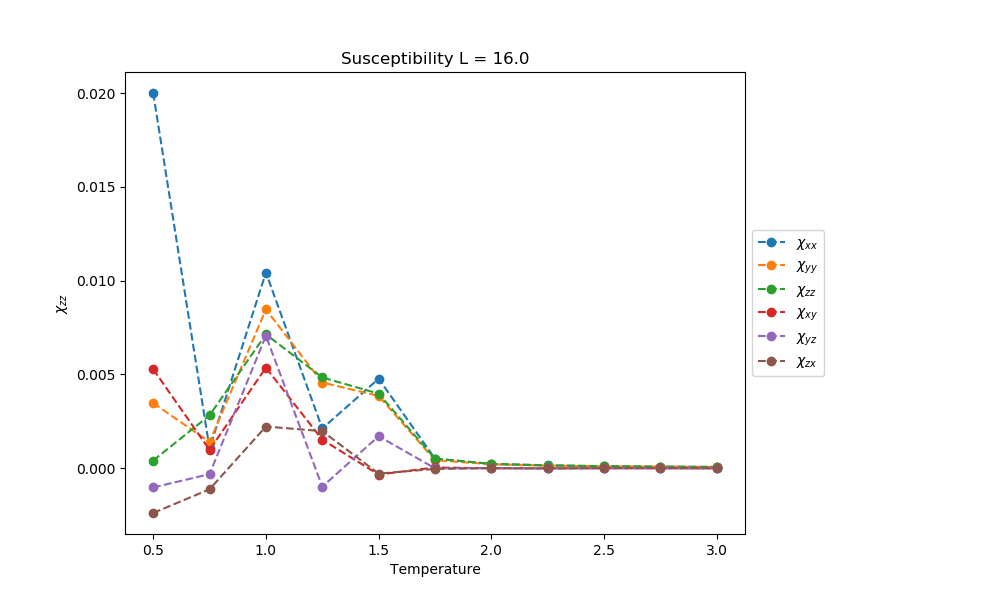

In [24]:
L_idx = 4


fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(T, chi_xx[L_idx], "o--", label=r"$\chi_{xx}$")
ax.plot(T, chi_yy[L_idx], "o--", label=r"$\chi_{yy}$")
ax.plot(T, chi_zz[L_idx], "o--", label=r"$\chi_{zz}$")
ax.plot(T, chi_xy[L_idx], "o--", label=r"$\chi_{xy}$")
ax.plot(T, chi_yz[L_idx], "o--", label=r"$\chi_{yz}$")
ax.plot(T, chi_zx[L_idx], "o--", label=r"$\chi_{zx}$")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.title(f"Susceptibility L = {L[L_idx]}")
plt.show()

### Binder ratio

In [25]:
b = 1-np.mean(m_magnitude**4, axis=2)/(3*np.mean(m_magnitude**2, axis=2)**2)

<IPython.core.display.Javascript object>


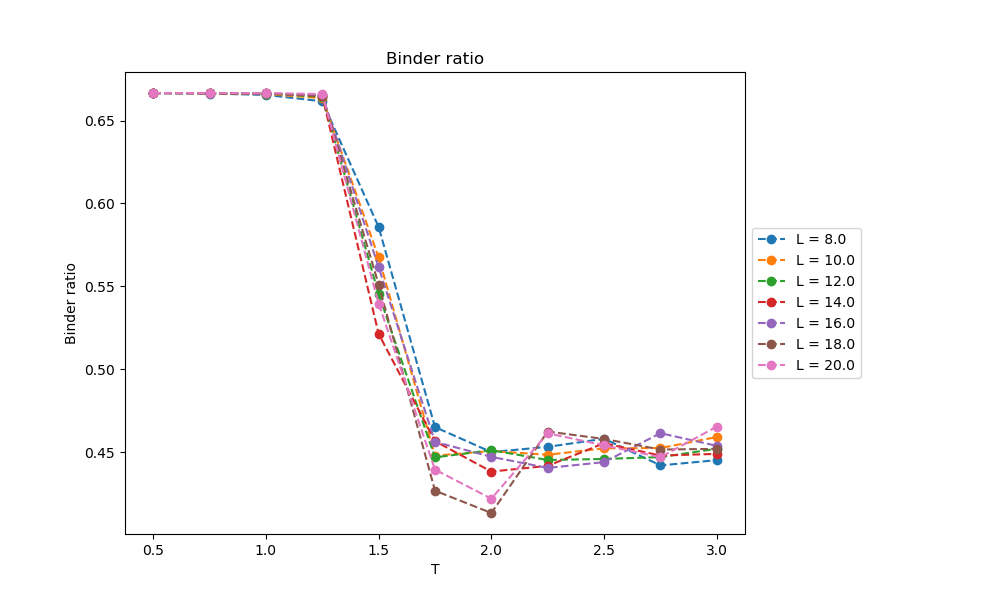

In [26]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, b[i], 'o--', label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r"Binder ratio")
plt.xlabel(r"T")
plt.title("Binder ratio")
plt.show()